In [46]:
import pandas as pd

In [50]:
import altair as alt

In [88]:
import numpy as np

In [53]:
import matplotlib.pyplot as plt

Exportamos una base propia sobre los distintos departamentos del Perú y el acceso de los hogares a diversas tecnologias de comunicación

In [97]:
conectividad=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSkth93gkqbmj6TAVl0YbgI2b2q7URTRpdJQ55UkhGrz0TEPMwE2h9fKVCwl3Zd2zR6wICZsl820D7N/pub?gid=0&single=true&output=csv")

In [ ]:
print(conectividad)

Si bien cada una de estas tienen diferentes valores, todos estan representados en porcentaje, por lo cual para crear la variable de conectividad solo se hara un promedio simple (sumatoria / cantidad )

In [99]:
newnombres = {"acceso a internet":"internet", "al menos una computadora":"compu","al menos un celular":"cel","acceso a television por cable":"cable","al menos un televisor":"tele","al menos una radio":"radio"}

Cambiamos los nombres, sin caracteres especiales, sin espacios, sin mayusculas

In [100]:
conectividad.rename(columns=newnombres, inplace= True)

In [101]:
conectividad.columns

Index(['departamentos', 'internet', 'compu', 'cel', 'cable', 'tele', 'radio'], dtype='object')

In [102]:
conectividad['indice'] = conectividad.eval("(internet+compu+cel+cable+tele+radio)/6")

In [ ]:
print(conectividad)

Si bien tenemos la data desagregada por variable, tenemos el promedio e "indice de conectividad" ahora, etiquetaremos este indice dandoles una categoria de: "malo" "medio" "bueno"

In [35]:
categ_labels = ['malo', 'medio', 'bueno']
categ_bins = [0,45,60,100]

In [36]:
conectividad['categoria'] = pd.cut(conectividad['indice'],
                              bins = categ_bins, labels = categ_labels)

In [ ]:
print(conectividad)

Ahora graficamos los datos obtenidos en el indice de conectividad; el plt.figure nos indica el tamaño del grafico, mientras que plt.width el grosor de las barras

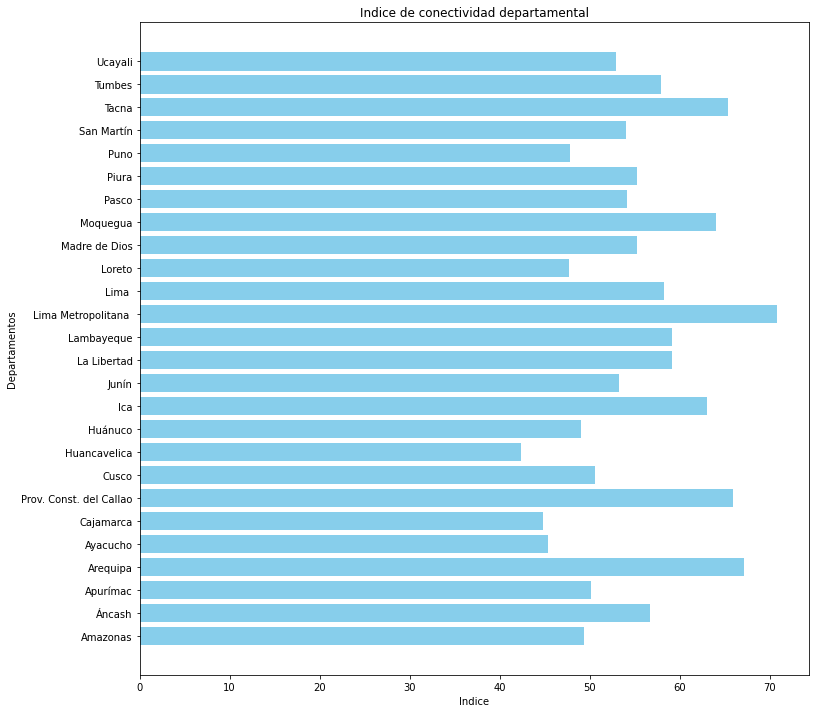

In [118]:
plt.figure(figsize = (12,12))
plt.width=0.2
eje_x = conectividad.departamentos
eje_y = conectividad.indice
plt.barh(eje_x,eje_y, color = "skyblue")
plt.ylabel("Departamentos")
plt.xlabel("Indice")
plt.title("Indice de conectividad departamental")
plt.show()

Exportamos el documento con los resultado de las elecciones generales 2021 (EG2021) en especifico, las votaciones a favor de Peru Libre

In [86]:
elecciones=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSkth93gkqbmj6TAVl0YbgI2b2q7URTRpdJQ55UkhGrz0TEPMwE2h9fKVCwl3Zd2zR6wICZsl820D7N/pub?gid=576395916&single=true&output=csv")

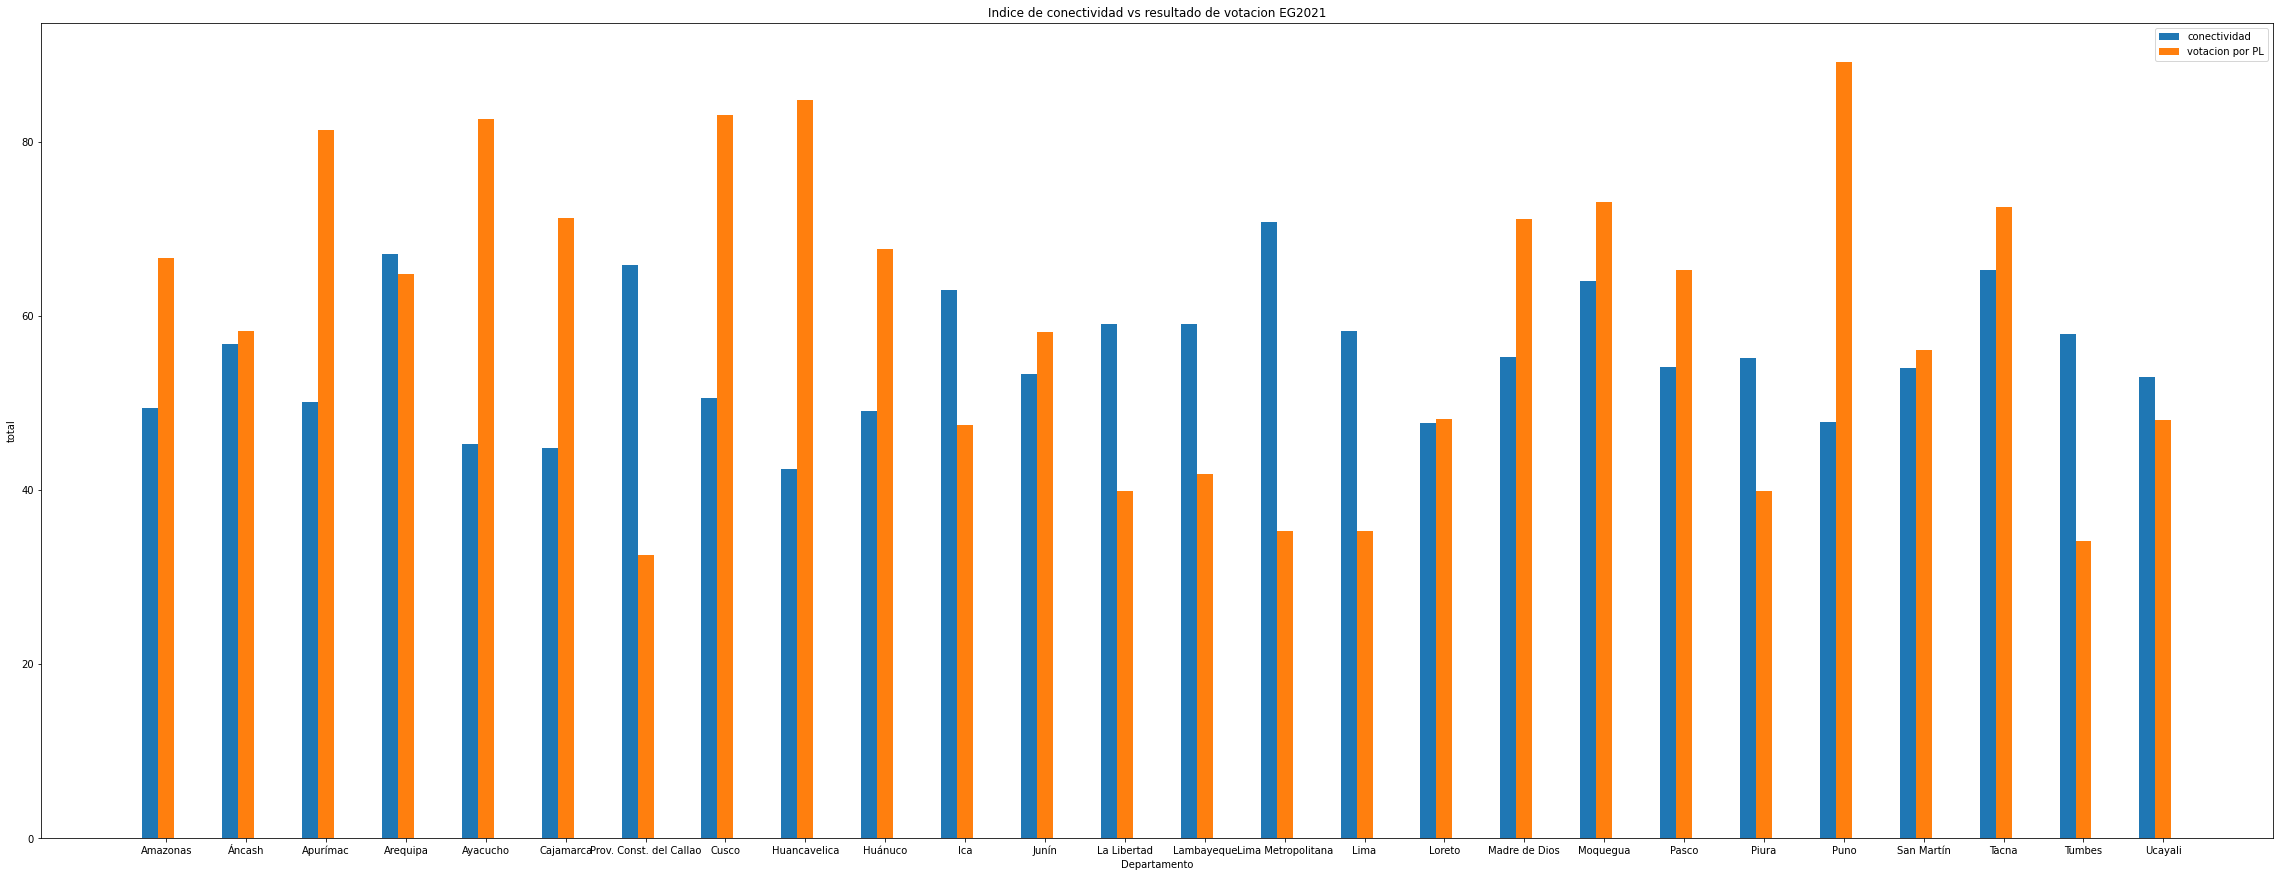

In [117]:
plt.figure(figsize=[40, 15])
serie_1=conectividad.indice
serie_2=elecciones.votacion
grupos= len(serie_1)
indice_barras = np.arange(grupos)
ancho_barras =0.20
plt.bar(indice_barras, serie_1, width=ancho_barras, label='conectividad')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='votacion por PL')
plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ("Amazonas","Áncash","Apurímac","Arequipa","Ayacucho","Cajamarca","Prov. Const. del Callao","Cusco","Huancavelica","Huánuco","Ica","Junín","La Libertad","Lambayeque","Lima Metropolitana","Lima","Loreto","Madre de Dios","Moquegua","Pasco","Piura","Puno","San Martín","Tacna","Tumbes","Ucayali"))
plt.ylabel('total')
plt.xlabel('Departamento')
plt.title('Indice de conectividad vs resultado de votacion EG2021')
 
plt.show()


Comparando ambos cuadros, tanto el indice de conectividad y las votacion por Peru Libre, tenemos una idea (sin comprobar) de que los departamentos con menor indice de conectividad votaron a favor de PL